In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Show first 5 rows
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Shape and basic info
print(df.shape)
df.info()
df.describe()

# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

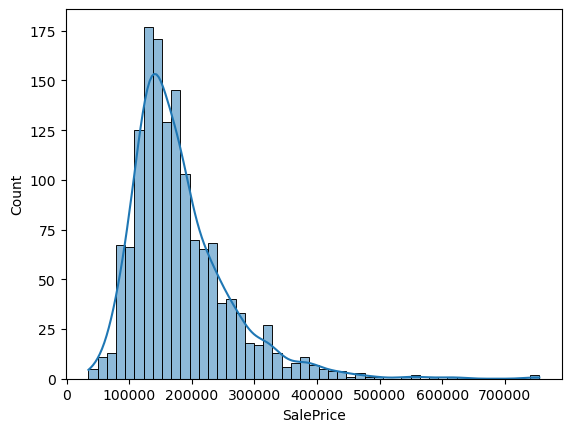

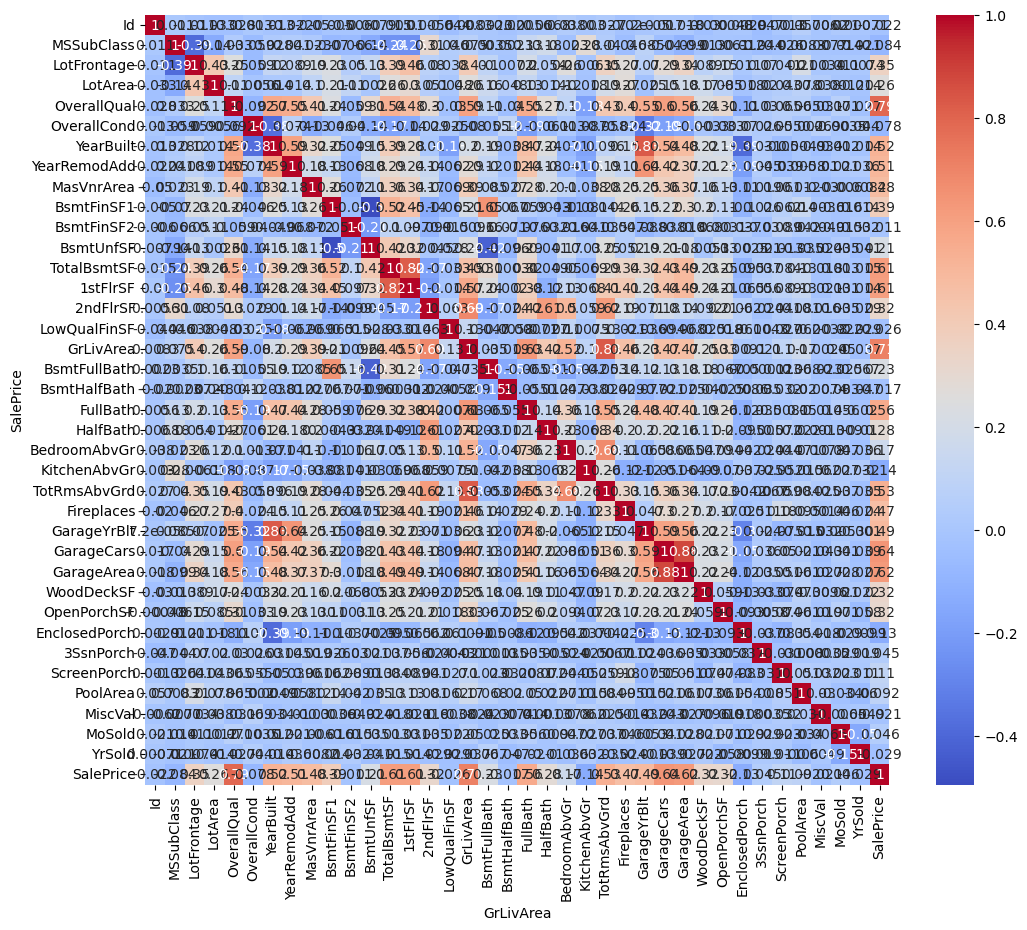

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable: SalePrice
sns.histplot(df['SalePrice'], kde=True)

# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Relationship between GrLivArea and SalePrice
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')


In [16]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [18]:

# Drop 'Id' as it's just an identifier
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Predict using Random Forest
y_pred_rf = rf.predict(X_test)

# Calculate RMSE and R²
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Results
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)


Random Forest RMSE: 28802.114183050202
Random Forest R²: 0.8918479137645855


In [42]:
print(X_train.isnull().sum().sort_values(ascending=False).head())
print(y_train.isnull().sum())


GarageYrBlt     64
MasVnrArea       6
MSSubClass       0
BsmtQual_TA      0
ExterCond_Fa     0
dtype: int64
0


In [44]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2)


Linear Regression RMSE: 52391.60214606265
Linear Regression R²: 0.6421429934936335


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


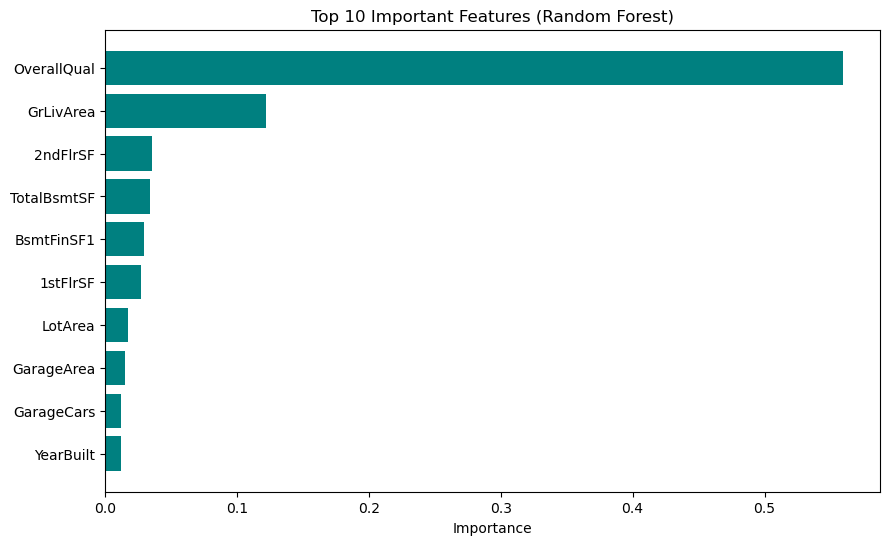

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and plot
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel("Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [50]:
import joblib

# Save the trained model
joblib.dump(rf, "house_price_model.pkl")


['house_price_model.pkl']

In [52]:
import os
os.getcwd()


'C:\\Users\\Lenovo'